## Check Email is Spam or Ham 

In [2]:
# import relevant library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import string
sns.set()

In [3]:
## Load the data 
data = pd.read_csv('spam1.csv')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
data1 = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Rename the columns 
clean_data = data1.rename(columns = {'v1': 'Review_rating', 'v2': 'Review_comment'})
clean_data

,Review_rating,Review_comment
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# make function for text cleaning and normalization 
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    return text

In [8]:
clean_data['Review_comment'] = clean_data['Review_comment'].apply(clean_text)

# Data Modelling

In [10]:
# split data into targets and inputs
x = clean_data['Review_comment']
y = clean_data['Review_rating']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_text, y_train, y_text = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
# inititalize TF-IDF vectorize
vectorize = TfidfVectorizer(stop_words='english')

In [13]:
# initialize the Multimonial Naive Bayes classified 
model = MultinomialNB()

In [14]:
# Create a pipeline that first vectorizes the text data then applies the Naive Bayes 
text_clf = make_pipeline(vectorize, model)

In [15]:
# train the model with training data
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [16]:
# predict the catergory of the text data
y_pred = text_clf.predict(x_text)

In [17]:
# calculate the classification report
report = classification_report(y_text,y_pred)

In [18]:
# calculate the confusion matrix 
conf_matrix = confusion_matrix(y_text,y_pred)

In [19]:
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       976
        spam       1.00      0.78      0.88       139

    accuracy                           0.97      1115
   macro avg       0.99      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [20]:
conf_matrix

array([[976,   0],
       [ 30, 109]], dtype=int64)

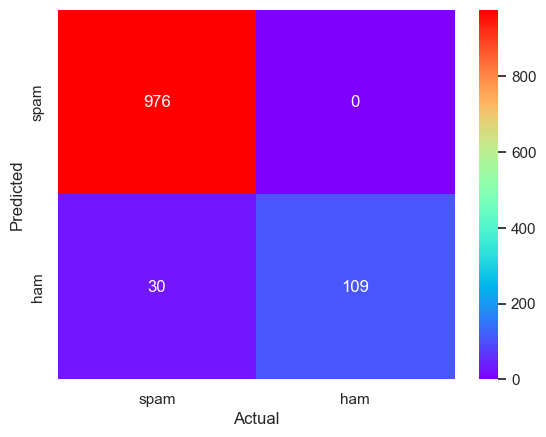

In [21]:
# represent confusion maztrix in heat map
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= 'rainbow',xticklabels=['spam','ham'],yticklabels=['spam','ham'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# COmpare this model with another ML models and check their accuracy with Naive Bayes model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
x_train_tfidf = tfidf.fit_transform(x_train)
x_text_tfidf = tfidf.transform(x_text)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Fit and evaluate each model
for model_name, model in models.items():
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_text_tfidf)
    accuracy = accuracy_score(y_text, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Naive Bayes Accuracy: 0.98
Logistic Regression Accuracy: 0.97
Random Forest Accuracy: 0.98
